# Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

In [2]:
completeDataSet = pd.read_csv("SeoulBikeData_.csv")

# Se añade el dia de la semana que representa la fecha
completeDataSet[["Date", "Seasons", "Holiday", "Functioning Day"]] = completeDataSet[["Date", "Seasons", "Holiday", "Functioning Day"]].astype("category")

# Determinar dia de la semana de acuerdo a la fecha
completeDataSet["Weekday"] = pd.to_datetime(completeDataSet["Date"], infer_datetime_format=True).dt.weekday_name
completeDataSet[["Weekday"]] = pd.Categorical(completeDataSet["Weekday"], categories=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"], ordered=True)

completeDataSet.info()

# Se filtran los datos nulos o vacios (Dias no funcionales)
functioning = completeDataSet[completeDataSet["Functioning Day"] == "Yes"]
functioning = functioning.drop(columns=["Functioning Day"])

# Se separa el dataset en los dias festivos y normales.
# Se elimina la columna para disminuir variables redundantes
holidays = functioning[functioning["Holiday"] == "Holiday"]
holidays = holidays.drop(columns=["Holiday"])
weekdays = functioning[functioning["Holiday"] == "No Holiday"]
weekdays = weekdays.drop(columns=["Holiday"])

print("\nEl data set contiene {} filas en las que el servicio esta disponible.".format(len(functioning.index)))
print("\nDe las cuales {} representan dias festivos.".format(len(holidays.index)))
print("\nLo que deja un total de {} que reprentan los dias de la semana que no son festivos y el sistema esta disponible.".format(len(weekdays.index)))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
Date                         8760 non-null category
Rented Bike Count            8760 non-null int64
Hour                         8760 non-null int64
Temperature(°C)              8760 non-null float64
Humidity(%)                  8760 non-null int64
Wind speed (m/s)             8760 non-null float64
Visibility (10m)             8760 non-null int64
Dew point temperature(°C)    8760 non-null float64
Solar Radiation (MJ/m2)      8760 non-null float64
Rainfall(mm)                 8760 non-null float64
Snowfall (cm)                8760 non-null float64
Seasons                      8760 non-null category
Holiday                      8760 non-null category
Functioning Day              8760 non-null category
Weekday                      8760 non-null category
dtypes: category(5), float64(6), int64(4)
memory usage: 749.4 KB

El data set contiene 8465 filas en las que el servicio esta dispo

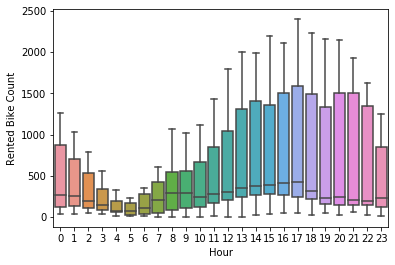

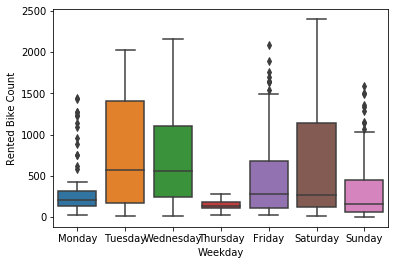

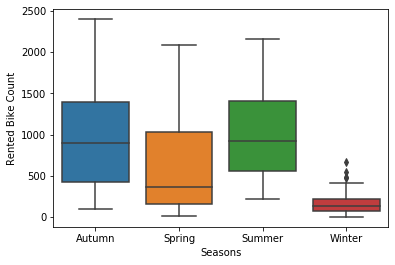

In [3]:
sns.boxplot(x="Hour", y="Rented Bike Count", data=holidays)
plt.show()
sns.boxplot(x="Weekday", y="Rented Bike Count", data=holidays)
plt.show()
sns.boxplot(x="Seasons", y="Rented Bike Count", data=holidays)
plt.show()

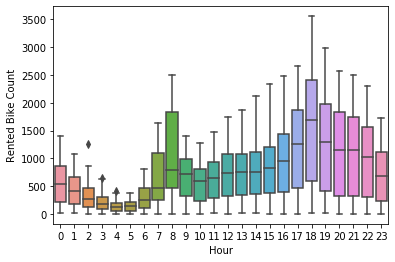

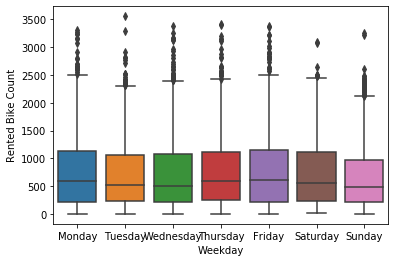

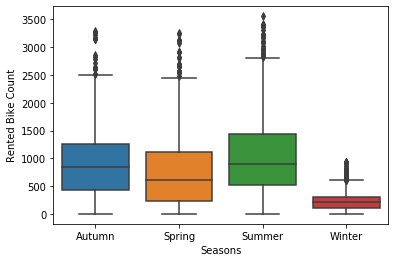

In [4]:
sns.boxplot(x="Hour", y="Rented Bike Count", data=weekdays)
plt.show()
sns.boxplot(x="Weekday", y="Rented Bike Count", data=weekdays)
plt.show()
sns.boxplot(x="Seasons", y="Rented Bike Count", data=weekdays)
plt.show()

In [5]:
holidays = pd.get_dummies(data=holidays, columns=["Seasons", "Weekday"])
weekdays = pd.get_dummies(data=weekdays, columns=["Seasons", "Weekday"])